<h1>B09705039_劉惟恩_HW08

In [1]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels

import statsmodels.formula.api as smf

<h2>16.5

In [2]:
#讀取資料集
df5 = pd.read_excel('Xr16-05.xlsx')

print('Head of dataset:')
display(df5.head())
print("Tail of dataset:")
display(df5.tail())

Head of dataset:


,Temperature,Beers
0,80,20533
1,68,1439
2,78,13829
3,79,21286
4,87,30985


Tail of dataset:


,Temperature,Beers
5,74,17187
6,86,30240
7,92,37596
8,77,9610
9,84,28742


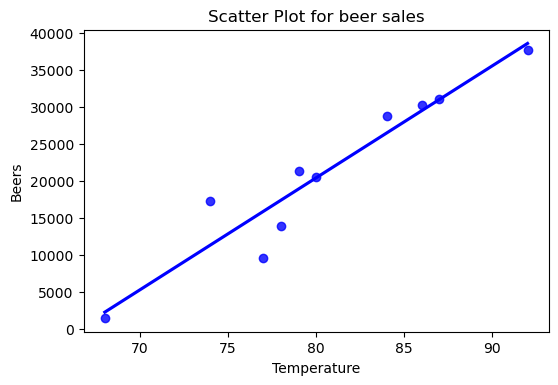

In [3]:
_ = sns.regplot(x='Temperature', y= 'Beers', data = df5, color = 'b', ci = None)
plt.title('Scatter Plot for beer sales')
plt.xlabel('Temperature')
plt.ylabel('Beers')
plt.show()

Set x as Temperature, y as Beers.

In [4]:
# Fit regression model 
df5_result1 = smf.ols('Beers~ Temperature', data=df5).fit()
# Inspect the results
print(df5_result1.summary())

b1 = df5_result1.params[1]
b0 = df5_result1.params[0]
print("\nEstimated model: y = %0.4f + %0.4f x" % (b0, b1))

                            OLS Regression Results                            
Dep. Variable:                  Beers   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     80.61
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.89e-05
Time:                        22:02:00   Log-Likelihood:                -94.740
No. Observations:                  10   AIC:                             193.5
Df Residuals:                       8   BIC:                             194.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.007e+05   1.36e+04     -7.395      

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<h3>(a)

$b_0$ = -100678.1723, $b_1$ = 1513.3276

<h3>(b)

$b_0$: The intercept is -100678.1723. Cannot be interpret since there is no data near temperature = 0. <br>
$b_1$: The slope of the line. For each additional rise of temperature, the beer sales increases by an average of 1513.3276.

<h2>16.15

In [5]:
#讀取資料集
df15 = pd.read_excel('Xr16-15.xlsx')

print('Head of dataset:')
display(df15.head())
print("Tail of dataset:")
display(df15.tail())

Head of dataset:


,Income,Food
0,53,188.24
1,47,304.89
2,59,304.99
3,44,283.99
4,87,316.21


Tail of dataset:


,Income,Food
145,65,220.19
146,72,304.07
147,80,330.50
148,59,257.37
149,81,313.64


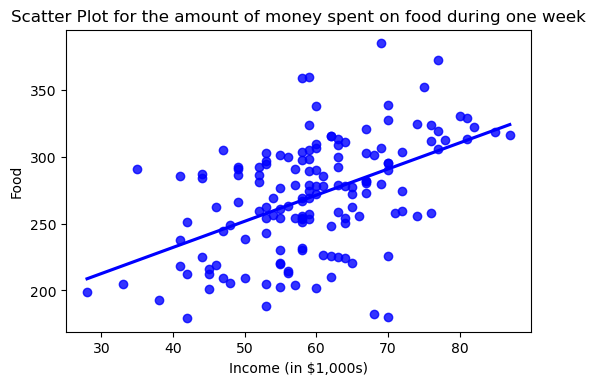

In [6]:
_ = sns.regplot(x='Income', y= 'Food', data = df15, color = 'b', ci = None)
plt.title('Scatter Plot for the amount of money spent on food during one week')
plt.xlabel('Income (in $1,000s)')
plt.ylabel('Food')
plt.show()

In [7]:
# Fit regression model 
df15_result1 = smf.ols('Food~ Income', data=df15).fit()
# Inspect the results
print(df15_result1.summary())

b1 = df15_result1.params[1]
b0 = df15_result1.params[0]
print("\nEstimated model: y = %0.4f + %0.4f x" % (b0, b1))

                            OLS Regression Results                            
Dep. Variable:                   Food   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     48.25
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.10e-10
Time:                        22:02:00   Log-Likelihood:                -753.23
No. Observations:                 150   AIC:                             1510.
Df Residuals:                     148   BIC:                             1516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.8986     17.020      9.042      0.0

Regression Line:<br>
y = 153.8986 + 1.9582 x<br>

Interpret the coefficients:<br>
$b_0$: The intercept is 153.8986. Cannot be interpret since there is no data near income = 0. <br>
$b_1$: The slope of the line. For each additional Income, the amount of money spent on food during one week increases by an average of 1.9582.

<h2>16.27

In [8]:
s2_e = df5_result1.mse_resid
print('MSE: ', s2_e)
s_e = df5_result1.mse_resid ** 0.5
print('Standard errors: ', s_e)
print("The sample mean of the dependent variable: ", df5['Beers'].mean())

r, pvalue = stats.pearsonr(df5['Beers'], df5['Temperature'])
print("r = ", r)

MSE:  12400763.34404352
Standard errors:  3521.471758234548
The sample mean of the dependent variable:  21144.7
r =  0.9537919899105395


(1) The standard errors (3521.471758234548) are smaller than the sample mean of the dependent variable (21144.7).
Hence our linear regression model is good.<br>
(2) The Correlation Coefficient = 0.9537919899105395
There is a very strong positive linear relationship (about 95%) between the beer sales and the temperature.<br>
There is no evidence of a negative linear relationship between temperature and the number of beers sold at Yankee Stadium in Exercise 16.5.

<h2>16.37

<h3>(a)

In [9]:
SSR = df15_result1.ssr
R2 = df15_result1.rsquared
print("SSR = ", SSR)
print("R2 = ", R2)

SSR =  201948.01601298043
R2 =  0.24587056865702062


Coefficient of determination = 0.24587056865702062<br>
Interpretation: About 25% of the variation in the food budget is explained by the variation in house-hold income.  The rest (75%) remains unexplained by this model.

<h3>(b)

Significance Test:<br>
Hypothesis Testing about $\beta_1$:<br>
H0:$\beta_1$ = 0 (No linear relationship.)<br>
H1:$\beta_1 \neq$ 0 (Linear relationship.)

This test in conducted in the chart of OLS Regression Results in 16.15. <br>
According to the chart the t is 6.946, and the p-value is 0.000. <br>
Since the p-value < alpha = 0.05, we reject H0 in favor of H1. There is sufficient evidence at alpha = 5% to infer that there are linear relationship between the two variables. There is evidence of a linear relationship between house-hold income and food budget.

<h2>16.43

When there are no linear relationship between two variables, $\rho$ = 0.<br>
The hypotheses are:<br>
H0: $\rho$ = 0<br>
H1: $\rho$ $\neq$ 0

In [10]:
def c_of_c_test(r, n):
    t_value = r * ((n-2)/(1 - r**2)) ** 0.5
    t_critical = stats.t.ppf(0.975, n - 2)
    pval = stats.t.sf(np.abs(t_value), n - 2)*2
    print('r = ', r)
    print('t_critical = ', t_critical)
    print('t = ', t_value)
    print('p_value = ', pval)
    return t_value


cor_mat = np.corrcoef(df15[['Food', 'Income']].values, rowvar = False)
n = df15.shape[0]
r_t_value = c_of_c_test(cor_mat[1,0], n)

r =  0.49585337415108977
t_critical =  1.9761224936033632
t =  6.946422350608931
p_value =  1.1047043543420718e-10


Since the p-value < alpha = 0.05, we reject H0 in favor of H1. There is sufficient evidence at alpha = 5% to infer that there are linear relationship between the two variables. The food budget and household income in Exercise 16.15 are linearly related.

<h2>16.49

In [11]:
#讀取資料集
df49 = pd.read_excel('Xr03-71.xlsx')

print('Head of dataset:')
display(df49.head())
print("Tail of dataset:")
display(df49.tail())

Head of dataset:


,Temperature,Distance
0,68,211
1,58,214
2,68,214
3,71,215
4,77,217


Tail of dataset:


,Temperature,Distance
72,62,210
73,90,216
74,76,214
75,79,214
76,69,212


<h3>(a)

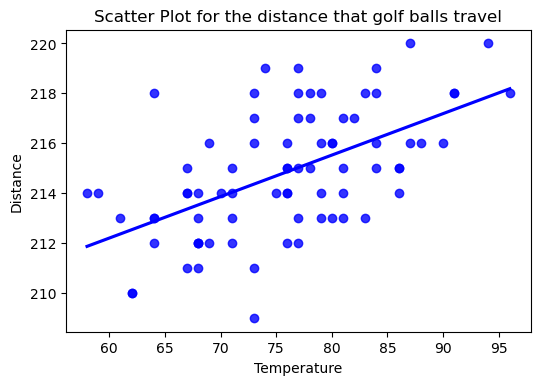

In [12]:
_ = sns.regplot(x='Temperature', y= 'Distance', data = df49, color = 'b', ci = None)
plt.title('Scatter Plot for the distance that golf balls travel')
plt.xlabel('Temperature')
plt.ylabel('Distance')
plt.show()

In [13]:
# Fit regression model 
df49_result1 = smf.ols('Distance~ Temperature', data=df49).fit()
# Inspect the results
print(df49_result1.summary())

b1 = df49_result1.params[1]
b0 = df49_result1.params[0]
print("\nEstimated model: y = %0.4f + %0.4f x" % (b0, b1))

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     34.75
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.00e-07
Time:                        22:02:00   Log-Likelihood:                -164.64
No. Observations:                  77   AIC:                             333.3
Df Residuals:                      75   BIC:                             338.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     202.2311      2.151     94.038      

In [14]:
s2_e = df49_result1.mse_resid
print('MSE: ', s2_e)
s_e = df49_result1.mse_resid ** 0.5
print('Standard errors: ', s_e)
print("The sample mean of the dependent variable: ", df49["Distance"].mean())

r, pvalue = stats.pearsonr(df49['Distance'], df49['Temperature'])
print("r = ", r)

MSE:  4.326207510827569
Standard errors:  2.0799537280496336
The sample mean of the dependent variable:  214.83116883116884
r =  0.562702713897726


(1) The standard errors (2.0799537280496336) are smaller than the sample mean of the dependent variable (214.83116883116884).
Hence our linear regression model is good.<br>
(2) The Correlation Coefficient = 0.562702713897726
There is a mederately strong positive linear relationship (about 56%) between the temperature and distance that golf balls travel.<br>
There is enough evidence of a positive linear relationship.

<h3>(b)

The slope coefficient interpretation:<br>
For each additional rise of temperature, the amount of distance that golf balls travel increases by an average of 0.1662.

<h3>(c)

In [15]:
SSR = df49_result1.ssr
R2 = df49_result1.rsquared
print("SSR = ", SSR)
print("R2 = ", R2)

SSR =  324.4655633120677
R2 =  0.31663434422786607


Coefficient of determination = 0.31663434422786607<br>
Interpretation: About 32% of the variation in the distance that golf balls travel is explained by the variation in temperature.  The rest (68%) remains unexplained by this model.

<h2>16.81

In [16]:
def CI_PI_simple_regression(x, y, x1, a):
    x_new = np.array([1, x1])
    print("make CI and PI predictions at mean of x = ", x1)
    X2 = sm.add_constant(x)
    olsmod = sm.OLS(y, X2)
    result_reg = olsmod.fit()
    y_head = np.dot(result_reg.params, x_new)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    cov_mat1 = np.cov(y, x)
    x_bar = x.mean()
    core1 = (1 / result_reg.nobs + 
         (x1 - x_bar) ** 2 / (result_reg.nobs - 1) / cov_mat1[1,1] ) ** 0.5
    core2 = (1 + 1 / result_reg.nobs + 
         (x1 - x_bar) ** 2 / (result_reg.nobs - 1) / cov_mat1[1,1] ) ** 0.5
    lower_bound = y_head + t_minus * (result_reg.mse_resid ** 0.5) * core1
    upper_bound = y_head + t_plus * (result_reg.mse_resid ** 0.5) * core1
    half_interval = t_plus * (result_reg.mse_resid ** 0.5) * core1
    lower_bound2 = y_head + t_minus * (result_reg.mse_resid ** 0.5) * core2
    upper_bound2 = y_head + t_plus * (result_reg.mse_resid ** 0.5) * core2
    half_interval2 = t_plus * (result_reg.mse_resid ** 0.5) * core2
    print("Confidence interval for mean: [%0.4f, %0.4f]" % (lower_bound, upper_bound))
    print("    or %0.4f  +- %0.4f" % (y_head, half_interval))
    print("Prediction interval = [%0.4f, %0.4f] " % (lower_bound2, upper_bound2))
    print("    or %0.4f  +- %0.4f" % (y_head, half_interval2))
    CI_PI = np.array([lower_bound, upper_bound, lower_bound2, upper_bound2])
    return CI_PI

In [17]:
CI_PI_result = CI_PI_simple_regression(df5['Temperature'], df5['Beers'], 75, 0.1)
print(CI_PI_result)

make CI and PI predictions at mean of x =  75
y_head =  12821.3981672394
Confidence interval for mean: [10127.0004, 15515.7959]
    or 12821.3982  +- 2694.3977
Prediction interval = [5740.3945, 19902.4019] 
    or 12821.3982  +- 7081.0037
[10127.00041908 15515.7959154   5740.39448027 19902.40185421]


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In this case, we use the prediction interval.<br>
There is 90% chance that the interval [5740.3945, 19902.4019] will cover the real number of beers to be sold when the temperature is 75 degrees.

<h2>16.91

In [18]:
CI_PI_result = CI_PI_simple_regression(df15['Income'], df15['Food'], 60, 0.1)
print(CI_PI_result)

make CI and PI predictions at mean of x =  60
y_head =  271.39089221034016
Confidence interval for mean: [266.3913, 276.3905]
    or 271.3909  +- 4.9996
Prediction interval = [210.0443, 332.7375] 
    or 271.3909  +- 61.3466
[266.39129751 276.39048691 210.04432133 332.73746309]


In this case, we use the prediction interval.<br>
There is 90% chance that the interval [210.0443, 332.7375] will cover the real food budget of a family whose household income is $60,000.

<h2>16.99

In [19]:
CI_PI_result = CI_PI_simple_regression(df49['Temperature'], df49['Distance'], 80, 0.05)
print(CI_PI_result)

make CI and PI predictions at mean of x =  80
y_head =  215.52613647750422
Confidence interval for mean: [214.9988, 216.0535]
    or 215.5261  +- 0.5274
Prediction interval = [211.3492, 219.7030] 
    or 215.5261  +- 4.1769
[214.99876395 216.05350901 211.34922963 219.70304332]


In this case, we use the prediction interval.<br>
There is 95% chance that the interval [211.3492, 219.7030] will cover the golfer’s real next drive travel distance when the temperature is 80 degrees.